## Solar System Simulation
This is a Solar System Simulation for some planets moving around a Sun in space. 
This project was achieved through Matplotlib and Pillow!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider
from IPython.display import display, Image as IPImage
from PIL import Image
import os
import sys

In [46]:
# Constants
G = 1 # for simplicity
dt = 0.01  # Larger timestep = faster motion
total_time = 5.0  # Simulate for 5 seconds
frames_per_second = 60  #60 FPS for smooth GIF
plot_limits = (-15,15)
trail_length = 100  # How many past positions to remember

total_frames = int(total_time * frames_per_second)

# Create output directory
os.makedirs("SolarSys_Images", exist_ok=True)

# Define bodies (mass, position, velocity)
sun_mass = 1000
bodies = [
    # Sun (stationary at center)
    {"mass": sun_mass, "pos": np.array([0.0, 0.0]), "vel": np.array([0.0, 0.0]), 
     "color": "Orange", "name": "Sun", "size": 200, "orbit_radius": 0},
    
    # Earth (perfect circular orbit at r=3)
    {"mass": 1, "pos": np.array([3.0, 0.0]), 
     "vel": np.array([0.0, np.sqrt(G*sun_mass/3.0)]),  # v = sqrt(GM/r)
     "color": "green", "name": "Earth", "size": 80, "orbit_radius": 3},
    
    # Mars (perfect circular orbit at r=5)
    {"mass": 1, "pos": np.array([0.0, 5.0]), 
     "vel": np.array([-np.sqrt(G*sun_mass/5.0), 0.0]),
     "color": "red", "name": "Mars", "size": 60, "orbit_radius": 5},
    
    # Jupiter (perfect circular orbit at r=8)
    {"mass": 1, "size": 120, "pos": np.array([-8.0, 0.0]),
     "vel": np.array([0.0, -np.sqrt(G*sun_mass/8.0)]),
     "color": "#D2B48C", "name": "Jupiter", "orbit_radius": 8}
]

# Initialize trail storage
for body in bodies:
    body['trail'] = []

In [47]:
def compute_force(p1, p2):
    r_vec = p1["pos"] - p2["pos"]
    r_mag = np.linalg.norm(r_vec)
    force_mag = G * p1["mass"] * p2["mass"] / (r_mag ** 2 + 1e-4) # the "1e-4" is a softening term to avoid explosions
    force_vec = -force_mag * (r_vec / r_mag)
    return force_vec

In [ ]:
# Simulation loop
plt.ioff()  # Disable interactive plotting

for frame in range(total_frames):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_aspect('equal')
    ax.axis('off')  # Hide axes
    
    # Add after creating the axes (ax)
    for body in bodies[1:]:
        orbit = plt.Circle((0,0), body["orbit_radius"], 
                        color=body["color"], fill=False, 
                        linestyle='--', alpha=0.2)
        ax.add_patch(orbit)
    
    # Physics update
    for i, p1 in enumerate(bodies):
        p1["force"] = np.zeros(2)
        for j, p2 in enumerate(bodies):
            if i != j:
                p1["force"] += compute_force(p1, p2)
    
    for body in bodies:
        body["vel"] += body["force"] / body["mass"] * dt
        body["pos"] += body["vel"] * dt
        
        # Store position for trail
        body['trail'].append(body["pos"].copy())
        if len(body['trail']) > trail_length:
            body['trail'].pop(0)
        
        # Plot trail
        if len(body['trail']) > 1:
            trail_x = [p[0] for p in body['trail']]
            trail_y = [p[1] for p in body['trail']]
            ax.plot(trail_x, trail_y, color=body["color"], alpha=0.4, linewidth=1.5)
        
        # Plot planet with border
        planet = Circle(body["pos"], body["size"]/200, 
                       color=body["color"], 
                       ec='white',  # White border
                       lw=1,     # Border width
                       zorder=5)   # Draw on top
        ax.add_patch(planet)
        '''
        # Label planets
        if frame % 30 == 0:  # Update labels occasionally
            ax.text(body["pos"][0], body["pos"][1]+0.5, body["name"], 
                    color='white', ha='center', fontsize=8)
        '''

    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label=body["name"],
                markerfacecolor=body["color"], markersize=10)
        for body in bodies
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
    ax.legend()
    plt.savefig(f"SolarSys_Images/frame_{frame:04d}.png", dpi=100, bbox_inches='tight',facecolor='black')
    plt.close(fig)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

### Creating the Gif

In [49]:
def create_gif(input_folder, output_file, duration=100, loop=0):
    """
    Create a GIF from a folder of images and display it in the notebook.
    
    Parameters:
        input_folder (str): Path to folder containing images
        output_file (str): Path to save the GIF (e.g., 'output.gif')
        duration (int): Duration between frames in milliseconds
        loop (int): Number of loops (0 for infinite)
    """
    # Get all image files from the folder
    images = []
    for file_name in sorted(os.listdir(input_folder)):
        if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            file_path = os.path.join(input_folder, file_name)
            images.append(Image.open(file_path))
    
    # Save as GIF
    if images:
        images[0].save(
            output_file,
            save_all=True,
            append_images=images[1:],
            duration=duration,
            loop=loop
        )
        print(f"GIF created successfully at {output_file}")
        
        # Display the created GIF in the notebook
        display(IPImage(filename=output_file))
    else:
        print("No images found in the folder")

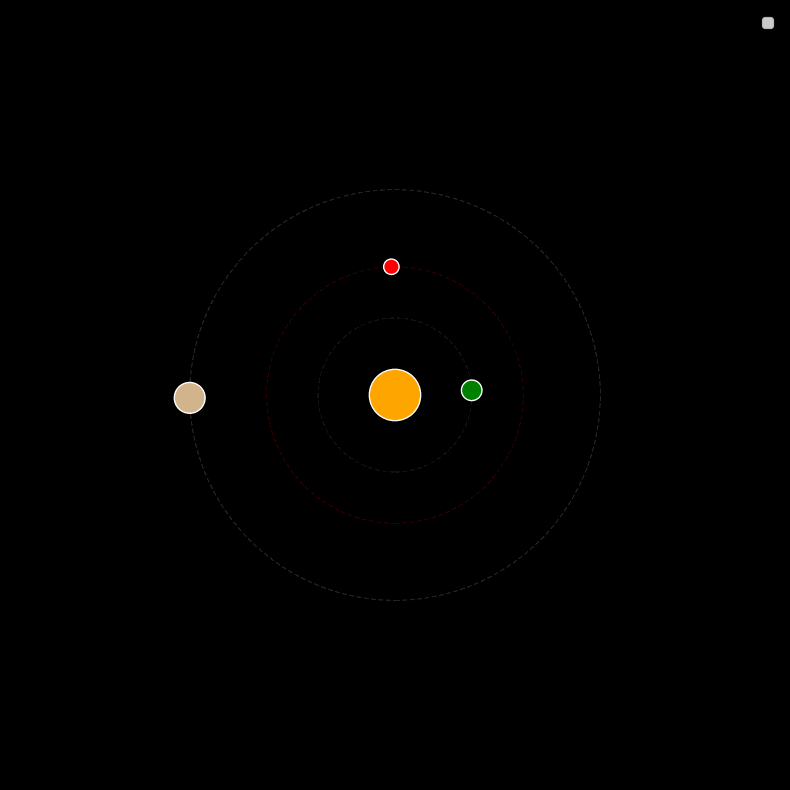

In [50]:
# Folder directory
input_folder = "SolarSys_Images"
output_gif = "SolarSystemAnimation.gif"
create_gif(input_folder, output_gif, duration=200, loop=0)